In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

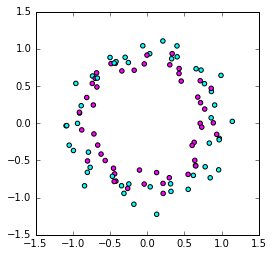

In [22]:
from sklearn.datasets import make_moons, make_circles

# make classification problem using datasets package
# X is an array of coordinates, y is the class of each pair of coordinates
X, y = make_circles(noise=0.1)

# represent the coordinates in several convenient ways
I, J = X.T # as two 1d arrays of coordinates
IJ = X[:,:2] # as an n_samples x 2 array of coordinates

# show the points and color them according to class
plt.gca().set_aspect('equal')
plt.scatter(I, J, c=y, cmap='cool')

In [28]:
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# fit a K-nearest-neighbors model to the training data.
# "fit" expects X, an array where each row is an "observation" (in this case a pair of coordinates)
# and y, which is the class label for each observation
model = RandomForestClassifier()
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
# now make a grid; we will predict a class for each grid point
resolution = 400 # arbitrary resolution
imin, imax = np.min(I), np.max(I)
jmin, jmax = np.min(J), np.max(J)
m = np.linspace(imin, imax, resolution) # i range
n = np.linspace(jmin, jmax, resolution) # j range
# make coordinates
M, N = np.meshgrid(m,n)
# reshape as resolution x 2 array of coordinates
# this is every point on the resolution x resolution grid
gX = np.dstack((M,N)).reshape(-1,2)
gX

array([[-1.09023832, -1.22415302],
       [-1.08463701, -1.22415302],
       [-1.0790357 , -1.22415302],
       ..., 
       [ 1.13348221,  1.10515211],
       [ 1.13908352,  1.10515211],
       [ 1.14468483,  1.10515211]])

In [31]:
# now use the model we fit to X to predict classes for gX
pred = model.predict(gX)
# reshape those classes into an image
pred_img = pred.reshape((resolution,resolution))
pred_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

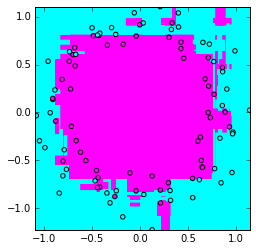

In [32]:
plt.gca().set_aspect('equal')
# plot the points and color them by class
plt.scatter(I, J, c=y, cmap='cool')
# plot the classified grid and color by class
plt.imshow(pred_img,origin='lower',cmap='cool',extent=[imin, imax, jmin, jmax])